# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

# Importing NewsApiClient
from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ddout\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Reading in api key environment variable

load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key = news_api_key)

In [42]:
# Fetch the Bitcoin news articles

btc_article = newsapi.get_everything(q = "Bitcoin", language="en" , page_size =100)

In [43]:
# Fetch the Ethereum news articles

eth_article = newsapi.get_everything(q = "Ethereum", language="en" , page_size =100)

In [44]:
# Creating a sentiment calculation function to call in the news api and make scores

def coin_score(coin_articles):
    coin_sentiments = []
    
    for article in coin_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            coin_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "neutral": neu,
                "negative": neg
            })
        
        except AttributeError as ae:
            pass

    # Creating coin_df Dataframes based on coin sentiments

    coin_df = pd.DataFrame(coin_sentiments)

    # Fixing order and naming of columns

    columns = ["date", "text", "compound", "positive", "neutral", "negative"]
    coin_df = coin_df[columns]

    return coin_df

In [45]:
# Create the Bitcoin sentiment scores DataFrame
## Dataframe called btc_df

btc_df = coin_score(btc_article)
btc_df.head()

,date,text,compound,positive,neutral,negative
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,1.000,0.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.831,0.169
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.887,0.067
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,1.000,0.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.854,0.091


In [46]:
# Create the Ethereum sentiment scores DataFrame
## Dataframe called eth_df

eth_df = coin_score(eth_article)
eth_df.head()

,date,text,compound,positive,neutral,negative
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.848,0.093
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.812,0.000
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.917,0.083
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.713,0.050
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.956,0.044


In [47]:
# Describe the Bitcoin Sentiment

btc_df.describe()

,compound,positive,neutral,negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.071864,0.071420,0.881550,0.047030
std,0.431508,0.069665,0.081464,0.057204
min,-0.778300,0.000000,0.694000,0.000000
25%,-0.255800,0.000000,0.837500,0.000000
50%,0.000000,0.067000,0.888000,0.000000
75%,0.430825,0.102500,0.935750,0.083750
max,0.910000,0.301000,1.000000,0.187000


In [48]:
# Describe the Ethereum Sentiment

eth_df.describe()

,compound,positive,neutral,negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.147154,0.078460,0.880540,0.040960
std,0.440291,0.073029,0.083929,0.060136
min,-0.913600,0.000000,0.688000,0.000000
25%,-0.012900,0.000000,0.835250,0.000000
50%,0.165500,0.069000,0.882000,0.000000
75%,0.514350,0.134250,0.936250,0.066000
max,0.862500,0.290000,1.000000,0.312000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherum had the highest mean at 0.078

Q: Which coin had the highest compound score?

A: Bitcoin at 0.91

Q. Which coin had the highest positive score?

A: Bitcoin at 0.30

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [49]:
# Importing NLTK and Python tokenize libraries

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [96]:
# Instantiate the lemmatizer

lemma = WordNetLemmatizer()

# Create a list of stopwords

stop_words = set(stopwords.words("english"))

# Expand the default stopwords list if necessary

sw_exp = {"char", "ha" ,"said" , "since", "way", "country", "dollar", "market"}
sw = stop_words.union(sw_exp)

In [97]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z]")
    for word in text:
        regex.sub(" ", word)
        if word in punctuation:
            text = text.replace(word, " ")
        
    # Create a tokenized list of the words
    
    words = word_tokenize(text)

    # Lemmatize words into root words
    
    lemmetized_words = [lemma.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    lower_case = [word.lower() for word in lemmetized_words]

    # Remove the stop words
    
    tokens = [word for word in lower_case if word not in stop_words]

    return tokens

In [98]:
# Create a new tokens column for Bitcoin
## List called btc_tokens

btc_tokens = []

for i in range (len(btc_df)):
    btc_tokens.append(tokenizer(btc_df["text"][i]))
    
btc_df["tokens"] = btc_tokens
btc_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,1.000,0.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.831,0.169,"[bitcoin, wa, seen, many, libertarian, leaning..."
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.887,0.067,"[feb, 22, reuters, bitcoin, miner, feeling, he..."
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,1.000,0.000,"[march, 1, reuters, bitcoin, ha, leapt, since,..."
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.854,0.091,"[whose, side, cryptocurrency, asked, satoshi, ..."


In [99]:
# Create a new tokens column for Ethereum
## List called eth_tokens

eth_tokens = []

for i in range (len(eth_df)):
    eth_tokens.append(tokenizer(eth_df["text"][i]))
    
eth_df["tokens"] = eth_tokens
eth_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.848,0.093,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.812,0.000,"[coinbase, reported, share, trading, volume, e..."
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.917,0.083,"[illustration, james, bareham, verge, 15, mill..."
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.713,0.050,"[sound, good, true, youre, wrong, yield, farmi..."
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.956,0.044,"[seems, 2022, cant, escape, metaverse, faceboo..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [100]:
# Importing Counter and ngrams libraries

from collections import Counter
from nltk import ngrams

In [101]:
# Creating function to flatgten tokens

def flatten(lst):
    return [item for sublist in lst for item in sublist]

# Creating a list for btc and eth

pp_btc = flatten(btc_tokens)
pp_eth = flatten(eth_tokens)

In [102]:
# Generate the Bitcoin N-grams where N=2

btc_grams = ngrams(pp_btc, n =2)

In [103]:
# Generate the Ethereum N-grams where N=2

eth_grams = ngrams(pp_eth, n= 2)

In [104]:
# Function token_count generates the top 10 words for a given coin

def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [105]:
# Use token_count to get the top 10 words for Bitcoin

btc_count = token_count(btc_grams)
btc_count

[(('char', 'london'), 7),
 (('char', 'bitcoin'), 6),
 (('new', 'york'), 6),
 (('reuters', 'bitcoin'), 5),
 (('since', 'russia'), 5),
 (('war', 'ukraine'), 5),
 (('char', 'new'), 5),
 (('char', 'march'), 4),
 (('invasion', 'ukraine'), 4),
 (('li', 'li'), 4)]

In [106]:
# Use token_count to get the top 10 words for Ethereum

eth_count = token_count(eth_grams)
eth_count

[(('char', 'cryptocurrency'), 6),
 (('char', 'happened'), 5),
 (('time', '’'), 4),
 (('char', 'personal'), 4),
 (('personal', 'finance'), 4),
 (('finance', 'insider'), 4),
 (('insider', 'writes'), 4),
 (('writes', 'product'), 4),
 (('product', 'strategy'), 4),
 (('strategy', 'tip'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [107]:
# Importing WordCloud libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

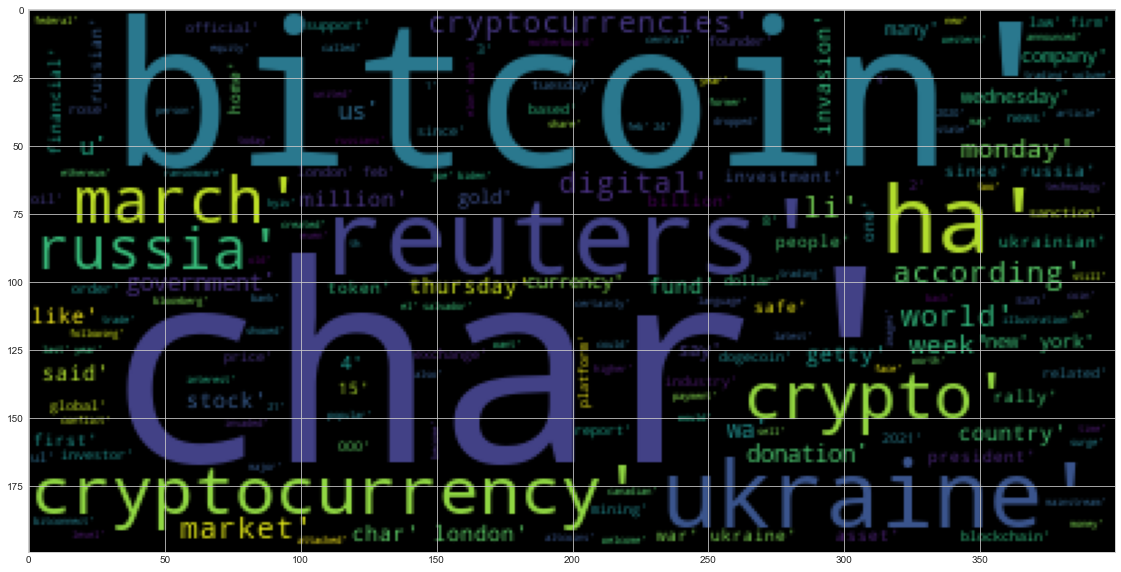

In [108]:
# Generate the Bitcoin word cloud
## Saving BTC WordCloud image

btc_wc = WordCloud().generate(str(pp_btc))
plt.imshow(btc_wc)
plt.savefig("../Images/btc_wc.png", format="png")

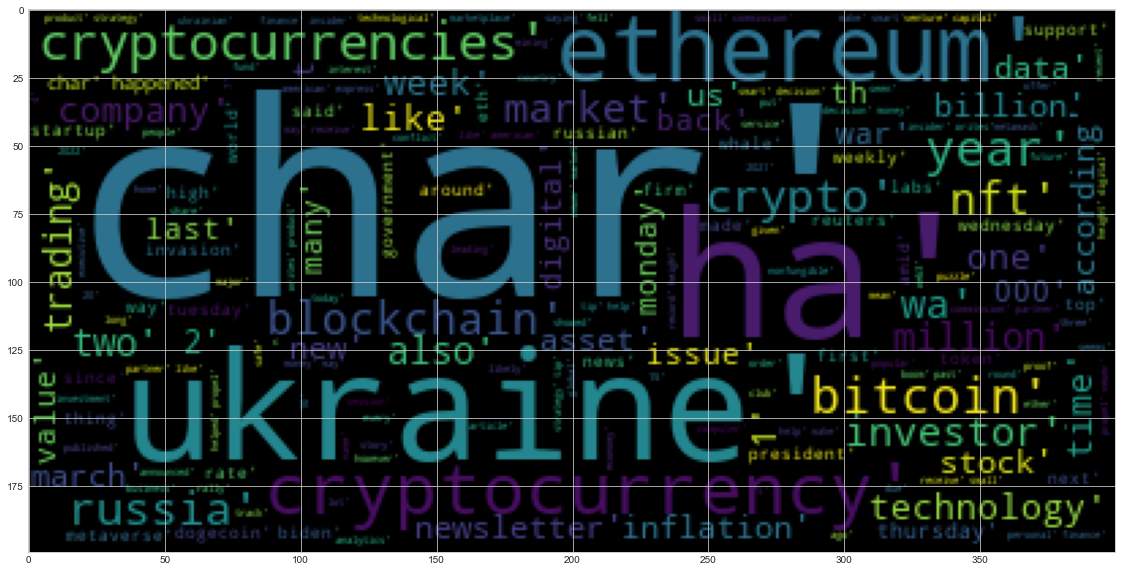

In [109]:
# Generate the Ethereum word cloud
## Saving ETH WordCloud image

eth_wc = WordCloud().generate(str(pp_eth))
plt.imshow(eth_wc)
plt.savefig("../Images/eth_wc.png", format="png")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [110]:
# Impolrting spacy library

import spacy
from spacy import displacy

In [111]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [112]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [113]:
# Concatenate all of the Bitcoin text together
## Called btc_text

btc_text = " ".join(btc_df["text"])

In [114]:
# Run the NER processor on all of the text

btc_ner = nlp(btc_text)

# Adding title to btc_ner

btc_ner.user_data["title"] = "Bitcoin NER - Name Entity Recognition"

In [115]:
# Render the visualization

displacy.render(btc_ner, style = "ent")

In [116]:
# List all Entities

btc_ner.ents

(Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,
 the New York Times,
 Feb 22,
 Reuters,
 2021,
 thousands,
 March 1,
 Reuters,
 Russia,
 Ukraine,
 Satoshi Nakamoto,
 2008,
 this week,
 Getty
 Welcome to,
 Nonfungible Tidbits,
 weekly,
 this week,
 Getty
 Welcome to,
 Nonfungible Tidbits,
 this week,
 Russia,
 Ukraine,
 Ukrainians,
 Russian,
 Nurphoto/Getty,
 Russia,
 last Thursday,
 Ukranian,
 Mexico City,
 Telegr,
 LONDON,
 March 4,
 Reuters,
 Russia,
 Ukraine,
 Russia,
 March 15,
 Reuters,
 U.S.,
 Joe Biden,
 KENNERDELL,
 Pa.,
 March 21,
 Reuters,
 Reuters,
 BITCOIN,
 Summary</li><li>,
 Law firms</li><li>,
 documents</li></ul,
 SAN SALVADOR,
 March 11,
 Reuters,
 El Salvador,
 between March 15 and 20,
 Central American,
 Ukrainian,
 Tom Lee,
 Ukraine,
 two-week,
 Tuesday,
 Russians,
 Ukrainians,
 Motherboard,
 one,
 first,
 Bitcoin,
 Bitcoin 2013,
 San Jose,
 2013,
 only 9 years,
 SEC,
 Satish Kumbhani,
 BitConnect,
 last week,
 $2.4 billion,
 Ponz

---

### Ethereum NER

In [117]:
# Concatenate all of the Ethereum text together
## Called eth_text

eth_text = " ".join(eth_df["text"])

In [119]:
# Run the NER processor on all of the text

eth_ner = nlp(eth_text)

# Adding title to eth_ner

eth_ner.user_data["title"] = "Etherum NER - Name Entity Recognition"

In [120]:
# Render the visualization

displacy.render(eth_ner, style = "ent")

In [121]:
# List all Entities

eth_ner.ents

(February,
 Ethereum Name Service,
 ENS,
 May 201,
 Coinbase,
 last year,
 Between 2020 and 2021,
 James Bareham,
 More than $15 million,
 More than $15 million,
 Ukrainian,
 Russia,
 2022,
 Facebook,
 Microsoft,
 the past few years,
 NFT,
 $23 billion,
 TIME,
 weekly,
 Joe Biden,
 Wednesday,
 first,
 TIME,
 weekly,
 the past few years,
 NFT,
 $23 billion,
 the past few years,
 NFT,
 $23 billion,
 NEW YORK,
 March 21,
 Reuters,
 a second straight week,
 CoinShares,
 Monday,
 Ethereum,
 $450 million,
 Series,
 US,
 over $7 billion,
 Russia,
 Ukraine,
 the days,
 March 11,
 Yuga Labs,
 Meebits,
 Larva Labs,
 more than a dozen,
 Ethereum,
 American Express,
 Tuesday,
 more than $4 million,
 Russia,
 Elliptic,
 Ukraine,
 Russia,
 Elliptic,
 nearly $55 million,
 Bitcoin, Ethereum,
 DogeCoin,
 Binance,
 June 28, 2021,
 REUTERS,
 Dado Ruvic/Illus,
 Russia,
 Ukraine,
 Bloomberg,
 Getty Images,
 only one,
 NFT,
 Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,


---